_______________________________________________________________________________________________________________________________________________________________________________________________
### Fase 1: Exploracion y limpieza
_______________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
# Importo librerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Leo los df y desplego todas las columnas
df_customer_activity = pd.read_csv("Customer Flight Activity.csv")
df_loyalty_customer = pd.read_csv("Customer Loyalty History.csv")
pd.set_option('display.max_columns', None)

In [3]:
# Creo una función para obtener información de los DF

def exploracion_inicial(df, titulo_df):
    if not df.empty:
        print(f"Tenemos {df.shape[0]} filas y {df.shape[1]} columnas")
        print("-"*60)
        print(f"A continuación se presenta la exploración inicial de : \n\n {titulo_df} \n")
        print("-"*60)
        print("Primeras 5 filas:")
        print("-"*60)
        display(df.head())
        print("-"*60)   
        print("Otras 5 filas aleatorias")
        print("-"*60)
        display(df.sample(5))
        print("-"*60)
        print("Exploración de duplicados:")
        print(f"Existen {df.duplicated().sum()} duplicados")
        print("-"*60)
        nulos_por_columna = df.isnull().sum() 
        total_nulos = nulos_por_columna.sum()
        print("Revisión de nulos:")
        if total_nulos == 0:
            print(" No se encontraron valores nulos en el DataFrame.")
        else:
            print(f"Se encontraron {total_nulos} valores nulos en total. El desglose por columna es:")
            print(nulos_por_columna[nulos_por_columna > 0])
        print("-"*60)
        print(f"Info sobre las columas de {titulo_df}:\n")
        print("-"*60)
        df.info()
        print("-"*60)
        print("Las medias estadísticas por fila son las siguientes:")
        display(df.describe().T)
        print("-"*60)
    else:
        print("El dataframe está vacío")    



In [4]:
exploracion_inicial(df_customer_activity, "Customer Flight Activity")

Tenemos 405624 filas y 10 columnas
------------------------------------------------------------
A continuación se presenta la exploración inicial de : 

 Customer Flight Activity 

------------------------------------------------------------
Primeras 5 filas:
------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


------------------------------------------------------------
Otras 5 filas aleatorias
------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
372867,156730,2018,11,5,5,10,3490,349.0,0,0
272564,213841,2018,5,7,0,7,2940,294.0,0,0
207149,332077,2018,1,0,0,0,0,0.0,0,0
325582,339220,2018,8,9,6,15,4335,433.0,0,0
185801,994219,2017,11,0,0,0,0,0.0,0,0


------------------------------------------------------------
Exploración de duplicados:
Existen 1864 duplicados
------------------------------------------------------------
Revisión de nulos:
 No se encontraron valores nulos en el DataFrame.
------------------------------------------------------------
Info sobre las columas de Customer Flight Activity:

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


------------------------------------------------------------


In [5]:
exploracion_inicial(df_loyalty_customer, "Customer Loyalty History")

Tenemos 16737 filas y 16 columnas
------------------------------------------------------------
A continuación se presenta la exploración inicial de : 

 Customer Loyalty History 

------------------------------------------------------------
Primeras 5 filas:
------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


------------------------------------------------------------
Otras 5 filas aleatorias
------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8759,833233,Canada,New Brunswick,Moncton,E1A 2A7,Female,Bachelor,69183.0,Single,Nova,10551.15,Standard,2015,8,NaN,NaN
3034,658726,Canada,Ontario,Ottawa,K1F 2R2,Female,College,NaN,Single,Aurora,10033.28,Standard,2016,2,2017.0,6.0
5221,604510,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,42914.0,Married,Aurora,22118.81,2018 Promotion,2018,3,NaN,NaN
16428,562324,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,69375.0,Married,Star,21592.10,Standard,2016,1,2016.0,9.0
14717,846950,Canada,British Columbia,Vancouver,V1E 4R6,Female,College,NaN,Married,Star,7672.68,Standard,2017,7,NaN,NaN


------------------------------------------------------------
Exploración de duplicados:
Existen 0 duplicados
------------------------------------------------------------
Revisión de nulos:
Se encontraron 33578 valores nulos en total. El desglose por columna es:
Salary                 4238
Cancellation Year     14670
Cancellation Month    14670
dtype: int64
------------------------------------------------------------
Info sobre las columas de Customer Loyalty History:

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender   

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


------------------------------------------------------------


In [6]:
# Hago la unión de ambos DF

df_unido = pd.merge(df_customer_activity, df_loyalty_customer, on="Loyalty Number", how='right')

In [7]:
# Hago una copia para aplicar la limpieza por si quiero corregir algo no volver más atrás:

df_limpieza = df_unido.copy() # A partir de aquí trabajo con este

_______________________________________________________________________________________________________________________________________________________________________________________________
#### TRATAMIENTO DE NOMBRES DE COLUMNAS, NORMALIZACIÓN, DUPLICADOS Y CORRECCIÓN DE DATO <0 ILÓGICO:
_______________________________________________________________________________________________________________________________________________________________________________________________

In [8]:
# Reviso las columnas que tengo y creo un diccionario para traducirlas (por esto desde el principio he dejado que haya un index, para tratar Loyalty_Number como una columna)
df_limpieza.columns

traducciones_columnas = {
    'Loyalty Number':'numero_socio',
    'Year': 'año_vuelo',
    'Month': 'mes_vuelo',
    'Flights Booked': 'vuelos_reservados',
    'Flights with Companions': 'vuelos_con_acompañantes',
    'Total Flights': 'total_vuelos',
    'Distance': 'distancia',
    'Points Accumulated': 'puntos_acumulados',
    'Points Redeemed': 'puntos_canjeados',
    'Dollar Cost Points Redeemed': 'coste_puntos_canjeados',
    'Country': 'pais',
    'Province': 'provincia',
    'City': 'ciudad',
    'Postal Code': 'codigo_postal',
    'Gender': 'genero',
    'Education': 'educacion',
    'Salary': 'salario',
    'Marital Status': 'estado_civil',
    'Loyalty Card': 'tarjeta_fidelidad',
    'CLV': 'clv', # Customer Lifetime Value
    'Enrollment Type': 'tipo_inscripcion',
    'Enrollment Year': 'año_inscripcion',
    'Enrollment Month': 'mes_inscripcion',
    'Cancellation Year': 'año_cancelacion',
    'Cancellation Month': 'mes_cancelacion'
}

#Traduzco las columnas a castellano para facilitarme la limpieza y el filtrado:

df_limpieza.rename(columns = traducciones_columnas, inplace = True)

In [9]:
df_limpieza.columns # Traducidas!

Index(['numero_socio', 'año_vuelo', 'mes_vuelo', 'vuelos_reservados',
       'vuelos_con_acompañantes', 'total_vuelos', 'distancia',
       'puntos_acumulados', 'puntos_canjeados', 'coste_puntos_canjeados',
       'pais', 'provincia', 'ciudad', 'codigo_postal', 'genero', 'educacion',
       'salario', 'estado_civil', 'tarjeta_fidelidad', 'clv',
       'tipo_inscripcion', 'año_inscripcion', 'mes_inscripcion',
       'año_cancelacion', 'mes_cancelacion'],
      dtype='object')

In [10]:
# Ahora voy a juntar las columnas de año y mes de inscripción en una que se llame "fecha_inscripción" y eliminar las separadas:
# zfill me ayuda a poner el 0 delante del número para poder pasarlo a período, antes intenté varios intentos con datetime64 pero no quedaba bien así que investigando descubrí el object "periodo"
df_limpieza["fecha_inscripción"] = pd.to_datetime(
    df_limpieza['año_inscripcion'].astype(str) + '-' + df_limpieza['mes_inscripcion'].astype(str).str.zfill(2) ).dt.to_period('M') 
#Eliminamos las columnas ahora sobrantes
df_limpieza.drop(columns=["mes_inscripcion", "año_inscripcion"], inplace=True)

In [11]:
#Inscripción Activa?
"""Las columnas mes_cancelación y año_cancelación, tienen muchisimos nulos, pero revisandolo mi hipótesis es que los que tienen fecha de cancelación es porque ya no son socios y
que no la tienen siguen siendo socios. Voy a crear una columna tipo texto que anuncie si todavía son socios o no y luego borro las 2 con muchos nulos para dejar el DF limpio sin 
perder información relevante"""

df_limpieza['inscripición_activa'] = np.where(df_limpieza['año_cancelacion'].notna(), "si", "no")
#Eliminamos las columnas llenas de nulos
df_limpieza.drop(columns=["mes_cancelacion", "año_cancelacion"], inplace=True)

In [12]:
# Eliminamos filas duplicadas 

if df_limpieza.duplicated().sum() > 0:
    df_limpieza = df_limpieza.drop_duplicates()
else:
    print("No se han encontrado duplicados en el DF")

In [13]:
# Columnas tipo object
df_limpieza.select_dtypes('object').columns

Index(['pais', 'provincia', 'ciudad', 'codigo_postal', 'genero', 'educacion',
       'estado_civil', 'tarjeta_fidelidad', 'tipo_inscripcion',
       'inscripición_activa'],
      dtype='object')

In [14]:
# Función para pasar el contenido de las columnas de texto a minúsculas y eliminar espacios:

columnas = ['pais', 'provincia', 'ciudad', 'codigo_postal', 'genero', 'educacion', 'estado_civil', 'tarjeta_fidelidad', 'tipo_inscripcion', 'inscripición_activa']

if not df_limpieza.empty:
    def normalizar(df, columnas_a_limpiar):

        print("Normalizamos el texto")
        for columna in columnas_a_limpiar:
            print(f"Limpiando la columna: {columna}")
            df[columna] = df[columna].str.lower()  # Paso 1: Convertimos a minúsculas
            df[columna] = df[columna].str.strip() # Paso 2: Elimino espacios de los bordes
        print("--- Normalización completada ---")
        return df

normalizar(df_limpieza, columnas) #LLamamos a la función

Normalizamos el texto
Limpiando la columna: pais
Limpiando la columna: provincia
Limpiando la columna: ciudad
Limpiando la columna: codigo_postal
Limpiando la columna: genero
Limpiando la columna: educacion
Limpiando la columna: estado_civil
Limpiando la columna: tarjeta_fidelidad
Limpiando la columna: tipo_inscripcion
Limpiando la columna: inscripición_activa
--- Normalización completada ---


,numero_socio,año_vuelo,mes_vuelo,vuelos_reservados,vuelos_con_acompañantes,total_vuelos,distancia,puntos_acumulados,puntos_canjeados,coste_puntos_canjeados,pais,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_fidelidad,clv,tipo_inscripcion,fecha_inscripción,inscripición_activa
0,480934,2017,1,0,0,0,0,0.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
1,480934,2017,2,3,0,3,2823,282.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
2,480934,2017,3,0,0,0,0,0.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
3,480934,2017,4,0,0,0,0,0.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
4,480934,2018,10,6,2,8,3352,335.0,465,38,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,2018,8,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si
405620,652627,2018,9,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si
405621,652627,2018,10,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si
405622,652627,2018,11,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si


In [15]:
# Me he percatado de que en salario el "min" en la exploración inicial es un valor < 0 , lo cual no tiene lógica, estoy casi segura que no por porsiacaso voy a revisar si alguna otra columna tiene negativos:

columnas_numericas = ['numero_socio', 'año_vuelo', 'mes_vuelo', 'vuelos_reservados',
       'vuelos_con_acompañantes', 'total_vuelos', 'distancia',
       'puntos_acumulados', 'puntos_canjeados', 'coste_puntos_canjeados',
       'salario', 'clv']

def rev_col_numericas(df, columna):

    for columna in columnas_numericas:

        print(f"--- Análisis de la Columna: '{columna}' <---")
        col = df[columna]
        num_negativos = (col.dropna() < 0).sum()     # Reviso si hay valores menores que 0
        if num_negativos > 0:
            print(f"Se encontraron {num_negativos} valores negativos (AQUI!!!!!!!!!!!).")
        else:
            print("No se encontraron valores negativos.")
        print("-"*60)

# Compruebo y verifico que solo salario tiene cifras negativas
rev_col_numericas(df_limpieza, columnas_numericas)

# Solo la columna salario tiene negativos, vamos a arreglar ese error y luego calcular sus valores estadisticos actuales, para decidir como imputar los nulos.

df_limpieza['salario'] = df_limpieza['salario'].abs()


# Compruebo que ya no hay salarios negativos y calculo valores estadísticos. (no uso agg porque quiero hacerlo más visual)

def rev_col_salario(df, columna): 

     print(f"--- Análisis de la Columna: '{columna}' ---") 

     col = df[columna] 
     print("-"*60) 
     # 2. Reviso si hay valores menores que 0 
     num_negativos = (col.dropna() < 0).sum() 
     if num_negativos > 0: 
         print(f"Se encontraron {num_negativos} valores negativos.") 
     else: 
         print("No se encontraron valores negativos.") 
     print("-"*60) 
     print("\n--- Estadísticas Descriptivas ---")  
     print(f"   - Media:    {col.mean():.2f}") 
     print(f"   - Mediana:  {col.median():.2f}") 
     print(f"   - Moda:     {col.mode()}") 
     print(f"   - Mínimo:   {col.min():.2f}") 
     print(f"   - Máximo:   {col.max():.2f}") 
     print("-" * (len(columna) + 28)) 
     

col_salario = 'salario'
rev_col_salario(df_limpieza, col_salario)

--- Análisis de la Columna: 'numero_socio' <---
No se encontraron valores negativos.
------------------------------------------------------------
--- Análisis de la Columna: 'año_vuelo' <---
No se encontraron valores negativos.
------------------------------------------------------------
--- Análisis de la Columna: 'mes_vuelo' <---
No se encontraron valores negativos.
------------------------------------------------------------
--- Análisis de la Columna: 'vuelos_reservados' <---
No se encontraron valores negativos.
------------------------------------------------------------
--- Análisis de la Columna: 'vuelos_con_acompañantes' <---
No se encontraron valores negativos.
------------------------------------------------------------
--- Análisis de la Columna: 'total_vuelos' <---
No se encontraron valores negativos.
------------------------------------------------------------
--- Análisis de la Columna: 'distancia' <---
No se encontraron valores negativos.
--------------------------------

_______________________________________________________________________________________________________________________________________________________________________________________________
#### TRATAMIENTO DE NULOS:
_______________________________________________________________________________________________________________________________________________________________________________________________

In [16]:
#Reviso los nulos de nuevo:

nulos_por_columna = df_limpieza.isnull().sum() 
total_nulos = nulos_por_columna.sum()
print("Revisión de nulos:")
if total_nulos == 0:
    print(" No se encontraron valores nulos en el DataFrame.")
else:
    print(f"Se encontraron {total_nulos} valores nulos en total. El desglose por columna es:")
    print(nulos_por_columna[nulos_por_columna > 0])

#Veo que salario es la única a la que le quedan nulos (un 25%), voy a revisar aleatorios para echarle un ojo:



Revisión de nulos:
Se encontraron 102260 valores nulos en total. El desglose por columna es:
salario    102260
dtype: int64


In [17]:
# Cuento cuantos numero_socio únicos hay, para tener el dato de cuantos clientes diferentes hay en listados:

print(f" El total de socios listados es {df_limpieza['numero_socio'].nunique()} incluyendo los que lo fueron pero ya no lo son")

 El total de socios listados es 16737 incluyendo los que lo fueron pero ya no lo son


In [18]:
"""Esto fue un error porque los resultados son infinitos y no consigo manejar nada con ellos, lo dejo para tener el desarrollo completo de la lógica que hice en el ejercicio,
pero ya tengo clarísimo que para lo que yo quería, que era echar un primer vistazo y saber que aplicar para imputar, no me sirve de nada"""
# Voy a agrupar los datos de salario contando cuantos socios cobran ccada cantidad."""
# salarios_agrupados_socios = df_limpieza.drop_duplicates(subset=['numero_socio']).groupby('salario')['numero_socio'].count()

'Esto fue un error porque los resultados son infinitos y no consigo manejar nada con ellos, lo dejo para tener el desarrollo completo de la lógica que hice en el ejercicio,\npero ya tengo clarísimo que para lo que yo quería, que era echar un primer vistazo y saber que aplicar para imputar, no me sirve de nada'

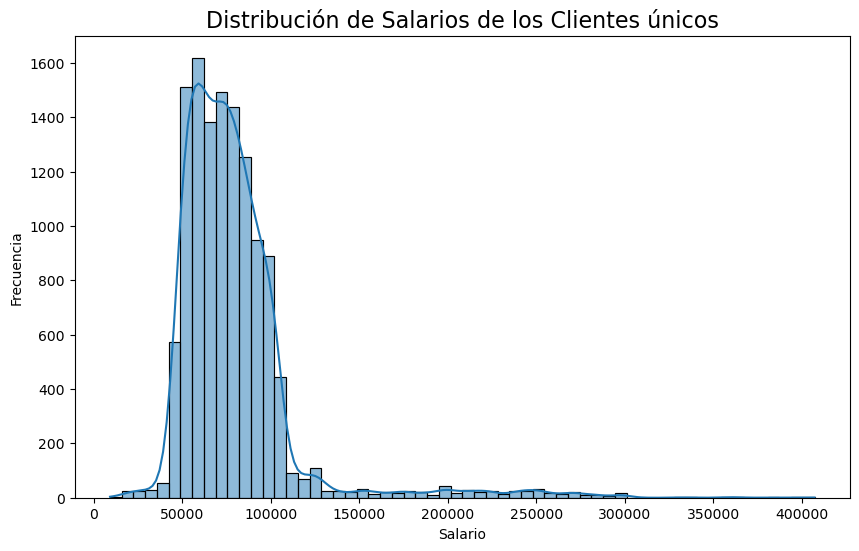

In [19]:
"""Creo un histograma para ver lo que intentaba en el paso anterior, pero pudiendo verlo no como con la tabla infinita.
Tengo dudas porque en este DF el mismo cliente viaja en muchos períodos y se repiten.
Creo UN df sin repetidos para ver el histograma para comparar y luego voy a aplicar el test de normalidad """

df_no_socios_duplicados = df_limpieza.drop_duplicates(subset=['numero_socio'])
serie_salario = df_no_socios_duplicados['salario']

plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_socios_duplicados, x='salario', kde=True, bins=60)
plt.title('Distribución de Salarios de los Clientes únicos', fontsize=16)
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
from scipy.stats import shapiro, kstest

#Función de clase

def check_normalidad(data):
    """
    Realiza la prueba de normalidad utilizando Shapiro-Wilk o Kolmogorov-Smirnov,
    dependiendo del tamaño de la muestra.
    
    Parámetros:
    - data: lista o array de datos numéricos
    
    Devuelve:
    - Diccionario con el tipo de prueba, p-value y decisión sobre H0
    """
    n = len(data)
    
    # Condición para elegir la prueba
    if n <= 5000:
        # Usar Shapiro-Wilk para muestras pequeñas y medianas
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        # Usar Kolmogorov-Smirnov para muestras grandes
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')

    # Decisión sobre la hipótesis nula
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    
    # Retornar los resultados
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }

# Aplico la función y me dice que se rechaza la hipótesis H0, por lo tanto los datos no siguen una distribución normal,  aplico la mediana.
check_normalidad(serie_salario)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': nan,
 'p-value': nan,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [21]:
""" Viendo el histograma y la fórumula considero que se podría imputar con la mediana para un resultado bastante robusto, pero en este a caso un cliente con educación básica 
que haya viajado un par de veces una persona con doctorado que viaja mucho se les imputaría el mismo salario, además que podría darse el caso incluso, de que estando repetido el mismo
cliente en muchas filas/periodos de tiempo, ya tuviese su salario real en alguna fila y le imputasemos uno completamente diferente en las que aparezcan nulos, 
de todos modos voy a probar con el KNN Imputer, para ver si consigo más precisión. Aún así, se me plantea la siguiente duda: ¿Como puede KNN crear un perfil del cliente e imputarle un salario
si lo que va a revisar son "vuelos", ya que cada fila es un período relacionado a un cliente (mes/año) y hay clientes que viajan muchas veces y otros que no lo hacen apenas??.
En cada rango se acumulan puntos, etc. No me cuadra como muy preciso."""


# Después de consultar mi duda en varias fuentes y con ayuda de GEMINI hemos desarrollado una tabla específica de clientes, creando un perfil 360ª con su información 


' Viendo el histograma y la fórumula considero que se podría imputar con la mediana para un resultado bastante robusto, pero en este a caso un cliente con educación básica \nque haya viajado un par de veces una persona con doctorado que viaja mucho se les imputaría el mismo salario, además que podría darse el caso incluso, de que estando repetido el mismo\ncliente en muchas filas/periodos de tiempo, ya tuviese su salario real en alguna fila y le imputasemos uno completamente diferente en las que aparezcan nulos, \nde todos modos voy a probar con el KNN Imputer, para ver si consigo más precisión. Aún así, se me plantea la siguiente duda: ¿Como puede KNN crear un perfil del cliente e imputarle un salario\nsi lo que va a revisar son "vuelos", ya que cada fila es un período relacionado a un cliente (mes/año) y hay clientes que viajan muchas veces y otros que no lo hacen apenas??.\nEn cada rango se acumulan puntos, etc. No me cuadra como muy preciso.'

In [22]:
""" Creo un df propio con la información que considero pertinente de los clientes para hacer un KNN imputer que no lleve una hora y evite el sesgo clientes repetidos"""
print("-"*60)
print("--- Creando el perfil para cada cliente único ---")
print("-"*60)

#Creo un diccionario con las columnas y la funcion que queremos que se aplique con agg
agregaciones = {'distancia': 'sum','puntos_acumulados': 'sum','total_vuelos': 'sum','vuelos_con_acompañantes': 'sum', 'educacion': 'first', 'salario': 'first', 'clv': 'first'}
# Aplicamos el diccionario a una agrupación por número de socio, le pasamos el diccionario a agg y con todo esto creamos un diccionario con la info de los clientes y el salario nulo si es el caso.
df_clientes_final = df_limpieza.groupby('numero_socio').agg(agregaciones) 
# Transformo educacion en una variable numerica para poder usarla como indicativo para imputar el salario siendo 1 la educacion básica y 4 el doctorado)
education_map = {'college': 1, 'high school or below': 1, 'bachelor': 2, 'master': 3, 'doctor': 4}
df_clientes_final['educacion_num'] = df_clientes_final['educacion'].map(education_map)

print("-"*60)
print("La cantidad de nulos en el DF es:")
print("-"*60)
print(df_clientes_final.isnull().sum())

""" Una vez tengo creado es DF es sobre el que voy a aplicar el KKNimputer"""
print("-"*60)
print("Aplicando KNNImputer para imputar los salarios nulos")
# Creo una lista con las columnas numéricas que usaremos como características
caracteristicas_imputation = ['salario', 'clv', 'educacion_num', 'distancia','puntos_acumulados', 'total_vuelos', 'vuelos_con_acompañantes']

df_provisional_imputar = df_clientes_final[caracteristicas_imputation] #Creo un Df provisional para no modificar el de clientes y quedarme solo con las columnas que se pueden usar para elKNNi

scaler = StandardScaler()
df_imputar_scaled = scaler.fit_transform(df_provisional_imputar) #Escala todos los valores a cantidades "similares" para que el KNNi no priorice unas a otras (resta la media de su columna y divide por su desviación estándar)

imputer = KNNImputer(n_neighbors=5) #Formula de clase para aplicar el KNNi
df_imputado_escalado = imputer.fit_transform(df_imputar_scaled)

df_provisional_imputar_array = scaler.inverse_transform(df_imputado_escalado) #"Inveso a escalar" Devuelve los datos a su cantidad natural
df_provisional_imputar = pd.DataFrame(df_provisional_imputar_array, columns=caracteristicas_imputation, index=df_provisional_imputar.index)
print("-"*60)
df_clientes_final['salario'] = df_provisional_imputar['salario'] #Relleno con la columa 'salario' la de nuestro DataFrame final
print("\nImputación completa, comprobación de nulos:")
print("-"*60)
print("La cantidad de nulos en el DF es:")
print("-"*60)
print(df_clientes_final.isnull().sum())

------------------------------------------------------------
--- Creando el perfil para cada cliente único ---
------------------------------------------------------------
------------------------------------------------------------
La cantidad de nulos en el DF es:
------------------------------------------------------------
distancia                     0
puntos_acumulados             0
total_vuelos                  0
vuelos_con_acompañantes       0
educacion                     0
salario                    4238
clv                           0
educacion_num                 0
dtype: int64
------------------------------------------------------------
Aplicando KNNImputer para imputar los salarios nulos
------------------------------------------------------------

Imputación completa, comprobación de nulos:
------------------------------------------------------------
La cantidad de nulos en el DF es:
------------------------------------------------------------
distancia                  

In [24]:
# Introduzco los datos que creamos con KNNi en el paso anterior en mi df_limpieza

if 'numero_socio' in df_clientes_final.columns:                     # 1. Creamos el "mapa" de consulta.
    df_clientes_final.set_index('numero_socio', inplace=True)       # Necesitamos una Serie donde el índice sea 'numero_socio' y los valores sean los salarios imputados.
                                                                    # Si 'df_clientes_final' no tiene 'numero_socio' como índice, lo ponemos primero.

mapa_de_salarios = df_clientes_final['salario'] # Serie con los salarios que tienen nulos del df original

df_limpieza['salario_imputado'] = df_limpieza['numero_socio'].map(mapa_de_salarios)  # Map recorre las filas para revisar 
# 2. Usamos .map() para "traducir" cada numero_socio de df_limpieza a su salario correspondiente.
#    Esto crea una nueva columna en df_limpieza con todos los salarios, ya sin nulos.

# Reemplazo la columna vieja por la nueva y borro la nueva para no tenerla duplicada
df_limpieza['salario'] = df_limpieza['salario_imputado']
df_limpieza.drop(columns=['salario_imputado'], inplace=True)

print("La cantidad de nulos en el DF_LIMPIEZA es:")
print("-"*60)
print(df_limpieza.isnull().sum())

La cantidad de nulos en el DF_LIMPIEZA es:
------------------------------------------------------------
numero_socio               0
año_vuelo                  0
mes_vuelo                  0
vuelos_reservados          0
vuelos_con_acompañantes    0
total_vuelos               0
distancia                  0
puntos_acumulados          0
puntos_canjeados           0
coste_puntos_canjeados     0
pais                       0
provincia                  0
ciudad                     0
codigo_postal              0
genero                     0
educacion                  0
salario                    0
estado_civil               0
tarjeta_fidelidad          0
clv                        0
tipo_inscripcion           0
fecha_inscripción          0
inscripición_activa        0
dtype: int64


In [30]:
df_limpieza.columns

Index(['loyalty number', 'year', 'month', 'flights booked',
       'flights with companions', 'total flights', 'distance',
       'points accumulated', 'points redeemed', 'dollar cost points redeemed',
       'country', 'province', 'city', 'postal code', 'gender', 'education',
       'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type',
       'enrollment date', 'active enrollment'],
      dtype='object')

In [29]:
# Devuelvo los nombres de las columnas a sus originales en inglés para las gráficas, pero todo en minusculas:
 
columnas_ingles = {
    'numero_socio': "loyalty number",
    'año_vuelo': 'year',
    'mes_vuelo': 'month',
    'vuelos_reservados': 'flights booked',
    'vuelos_con_acompañantes': 'flights with companions',
    'total_vuelos': 'total flights',
    'distancia': 'distance',
    'puntos_acumulados': 'points accumulated',
    'puntos_canjeados': 'points redeemed',
    'coste_puntos_canjeados': 'dollar cost points redeemed',
    'pais': 'country',
    'provincia': 'province',
    'ciudad': 'city',
    'codigo_postal': 'postal code',
    'genero': 'gender',
    'educacion': 'education',
    'salario': 'salary',
    'estado_civil': 'marital status',
    'tarjeta_fidelidad': 'loyalty card',
    'clv': 'clv',
    'tipo_inscripcion': 'enrollment type',
    'fecha_inscripción': 'enrollment date',
    'inscripición_activa': 'active enrollment'
}

#Traduzco las columnas a castellano para facilitarme la limpieza y el filtrado:

df_limpieza.rename(columns = columnas_ingles, inplace = True)

In [37]:
#Elimino el índice del df_limpieza y me quedo el df_definitivo que se queda como df para simplificarme el trabajo a partir de aquí.

if 'loyalty number' in df_limpieza :
    df_limpieza.set_index('loyalty number', inplace=True)
else:
    print("<loyalty number> ya no es una columna o está siendo usada de index")   


<loyalty number> ya no es una columna o está siendo usada de index


In [38]:
df = df_limpieza.copy()
df.to_csv('actividad_historial_clientes.csv')

### CIERRE DE LA FASE 1 - Continúa en el siguiente Notebook